# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import BayesianEstimator, performance_stats, get_date_range, METRICS

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'

# Data

In [4]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

64 securities from 2008-11-28 to 2024-11-29 uploaded.
REMINDER: 64 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded


In [5]:
df_prices = fund.df_prices
df_prices_fees = fund._get_prices_after_fee(df_prices, fee)

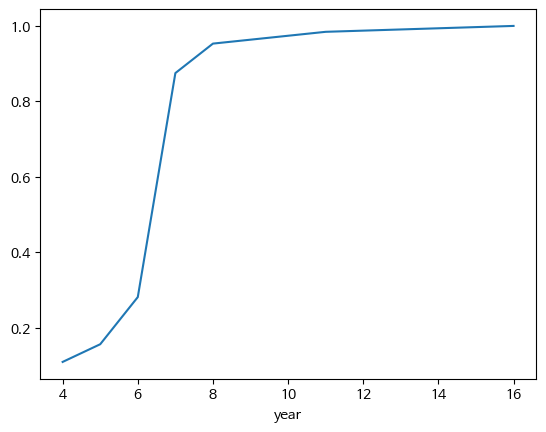

In [6]:
days_in_year = fund.days_in_year
df_year = get_date_range(df_prices).loc[:, 'n'].div(days_in_year).rename('year')
_ = df_year.groupby(df_year.round()).count().cumsum().div(df_year.count()).plot()

# Bayesian

## 1 Year Rate of Return

In [21]:
file_est = 'fund_ror_1y_241225v2'

### Split

In [22]:
y = 4
tickers = df_year.loc[df_year >= y].index.to_list()
len(tickers)

58

In [23]:
n = days_in_year
df_p = df_prices_fees[tickers]
df_train = df_p.iloc[:-n]
df_val = df_p.iloc[-n:]

### Estimate

In [10]:
kw = dict(
    days_in_year = days_in_year,
    security_names = fund.security_names
)
be = BayesianEstimator(df_train, **kw)

In [11]:
be.bayesian_sample(freq='1y', file=file_est, path=path_data)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_minus_two, mu, sig, ror]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 955 seconds.


data/fund_ror_1y_241225v2.pkl saved


#### Load

In [24]:
kw = dict(
    days_in_year = days_in_year,
    security_names = fund.security_names
)
be = BayesianEstimator.create(file_est, path_data, **kw)

data/fund_ror_1y_241225v2.pkl loaded


#### Visualize

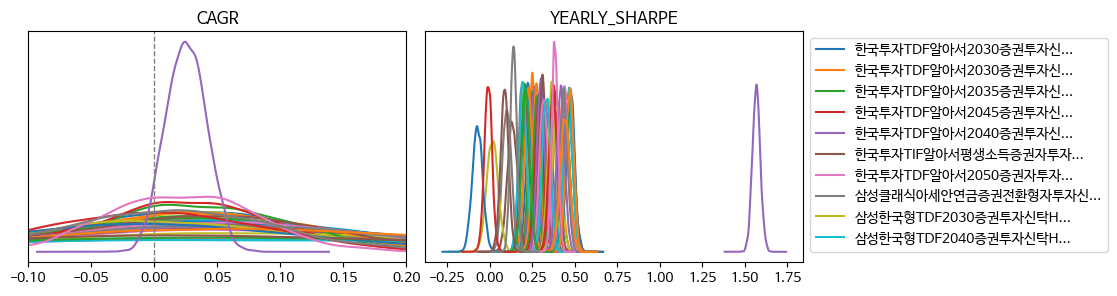

In [25]:
_ = be.plot_returns(xlim=(-0.1, 0.2), max_legend=10)

### Compare

In [26]:
n = 5

In [27]:
metrics = ['cagr', 'yearly_sharpe']
sort_by = metrics[0]
df = be.get_stats(metrics).T.sort_values(sort_by, ascending=False).iloc[:n]
t1 = df.index.to_list()

#fund.get_names(t1)
df

,start,end,cagr,yearly_sharpe
K55301BM7459,2017-03-31,2023-11-30,0.062756,0.382135
K55301BM7640,2017-03-31,2023-11-30,0.059319,0.384457
K55301BU5479,2017-08-31,2023-11-30,0.055628,0.373702
K55301BU6253,2017-08-31,2023-11-30,0.055309,0.380886
K55235BW6799,2017-09-29,2023-11-30,0.052623,0.284101


In [14]:
#var_name = 'ror'
var_name = 'cagr'

#sort_by = 'mean'
sort_by = 'hdi_3%'

df = be.bayesian_summary(var_name).droplevel(0).sort_values('hdi_3%', ascending=False).iloc[:n]
t2 = df.index.to_list()
#fund.get_names(t2)
#df

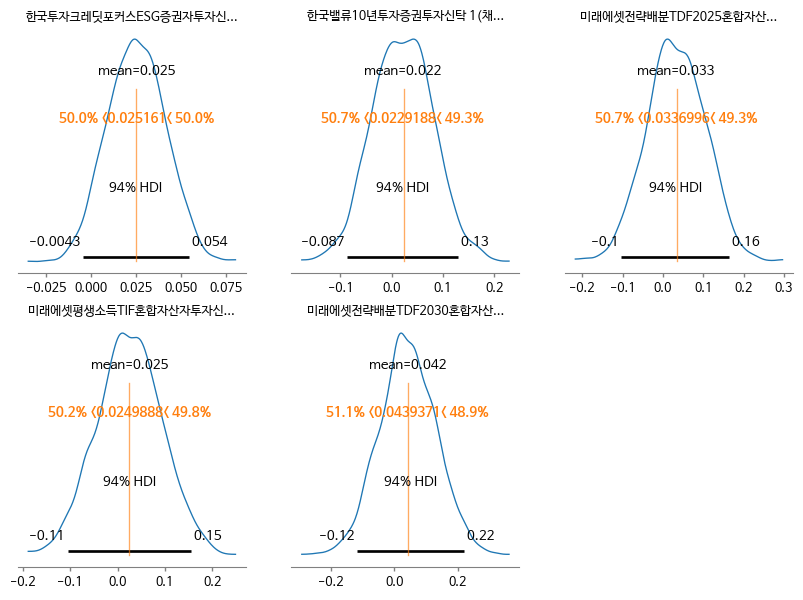

In [35]:
be.plot_posterior(var_name, t2, figsize=(10,7), textsize=9)

#### Validate

In [36]:
m = 'total_return'
func = lambda x: performance_stats(df_val[x]).loc[m].agg(['mean','std'])
func(t1).to_frame('by CAGR').join(func(t2).rename('by Bayesian'))

,by CAGR,by Bayesian
mean,0.189084,0.104010
std,0.024520,0.040361


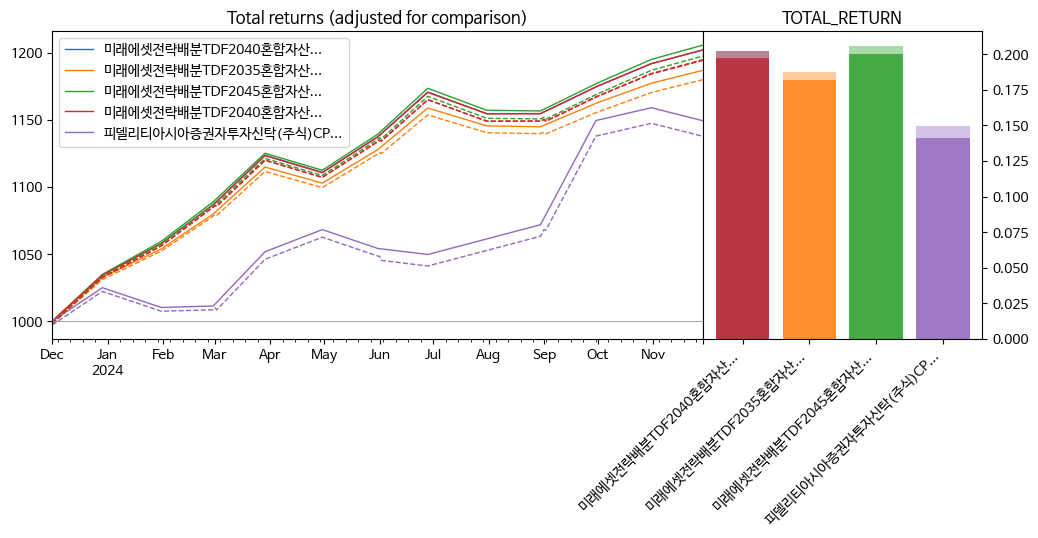

In [37]:
start = df_val.index.min()
fund.plot(t1, fee=fee, base=1000, metric=m, start_date=start)

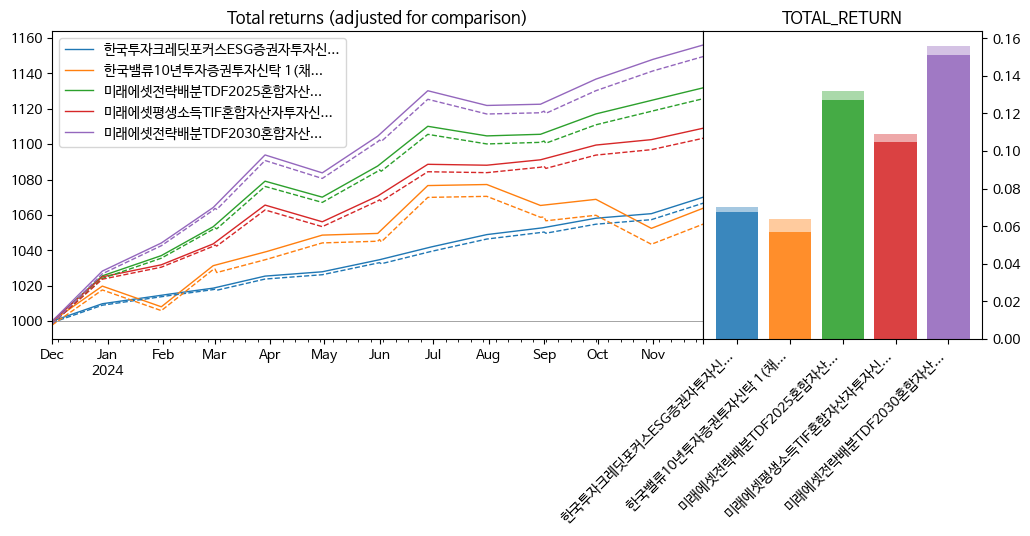

In [38]:
fund.plot(t2, fee=fee, base=1000, metric=m, start_date=start)

## 3 Year Rate of Return

In [39]:
file_est = 'fund_ror_3y_241225v2'

### Split

In [40]:
y = 7
tickers = df_year.loc[df_year >= y].index.to_list()
len(tickers)

38

In [41]:
n = days_in_year * 3
df_p = df_prices_fees[tickers]
df_train = df_p.iloc[:-n]
df_val = df_p.iloc[-n:]

### Estimate

In [21]:
kw = dict(
    days_in_year = days_in_year,
    security_names = fund.security_names
)
be = BayesianEstimator(df_train, **kw)

In [22]:
be.bayesian_sample(freq='3y', file=file_est, path=path_data)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_minus_two, mu, sig, ror]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 184 seconds.


data/fund_ror_3y_241225v2.pkl saved


#### Load

In [42]:
kw = dict(
    days_in_year = days_in_year,
    security_names = fund.security_names
)
be = BayesianEstimator.create(file_est, path_data, **kw)

data/fund_ror_3y_241225v2.pkl loaded


#### Visualize

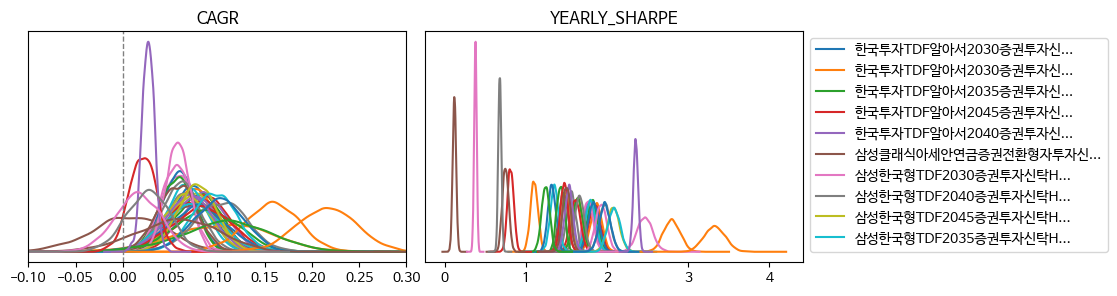

In [43]:
_ = be.plot_returns(xlim=(-0.1, 0.3), max_legend=10)

### Compare

In [52]:
n = 5

In [53]:
metrics = ['cagr', 'yearly_sharpe']
sort_by = metrics[0]
df = be.get_stats(metrics).T.sort_values(sort_by, ascending=False).iloc[:n]
t1 = df.index.to_list()

#fund.get_names(t1)
df

,start,end,cagr,yearly_sharpe
K55303BT4176,2017-11-30,2021-11-30,0.168659,0.698537
K55235BW6799,2017-09-29,2021-11-30,0.131873,0.70447
K55301BM7459,2017-03-31,2021-11-30,0.107828,0.74538
K55301BU5479,2017-08-31,2021-11-30,0.102728,0.732585
K55301BM7640,2017-03-31,2021-11-30,0.100791,0.743207


In [55]:
#var_name = 'ror'
var_name = 'cagr'

#sort_by = 'mean'
sort_by = 'hdi_3%'

df = be.bayesian_summary(var_name).droplevel(0).sort_values('hdi_3%', ascending=False).iloc[:n]
t2 = df.index.to_list()
#fund.get_names(t2)
df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ticker,,,,,,,,,
K55303BT4176,0.215,0.032,0.156,0.276,0.0,0.0,8615.0,2385.0,1.0
K55235BW6799,0.158,0.029,0.102,0.212,0.0,0.0,10096.0,2449.0,1.0
K55301BU6139,0.096,0.024,0.053,0.142,0.0,0.0,12505.0,2781.0,1.0
K55301BU6253,0.101,0.027,0.051,0.149,0.0,0.0,8650.0,2486.0,1.0
K55301BU5479,0.103,0.028,0.047,0.153,0.0,0.0,9602.0,2667.0,1.0


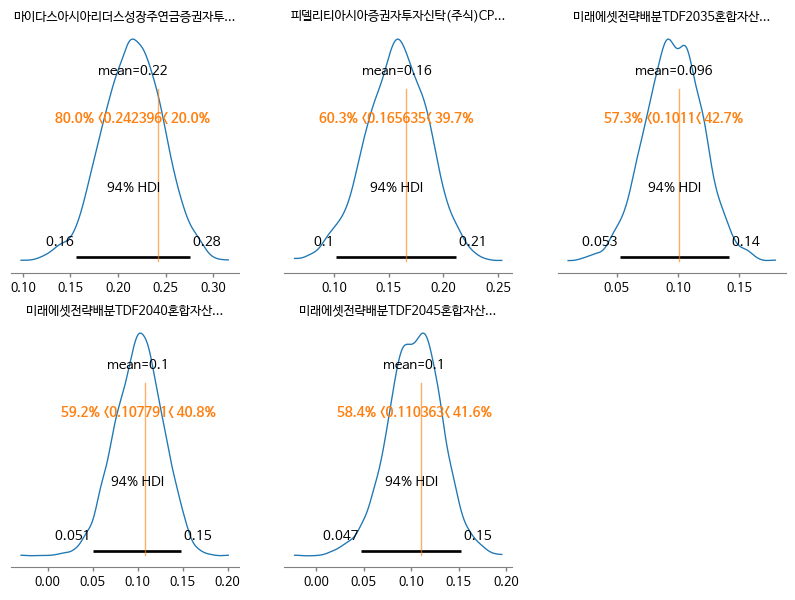

In [47]:
be.plot_posterior(var_name, t2, figsize=(10,7), textsize=9)

#### Validate

In [48]:
m = 'total_return'
func = lambda x: performance_stats(df_val[x]).loc[m].agg(['mean','std'])
func(t1).to_frame('by CAGR').join(func(t2).rename('by Bayesian'))

,by CAGR,by Bayesian
mean,0.048065,0.048242
std,0.094500,0.094667


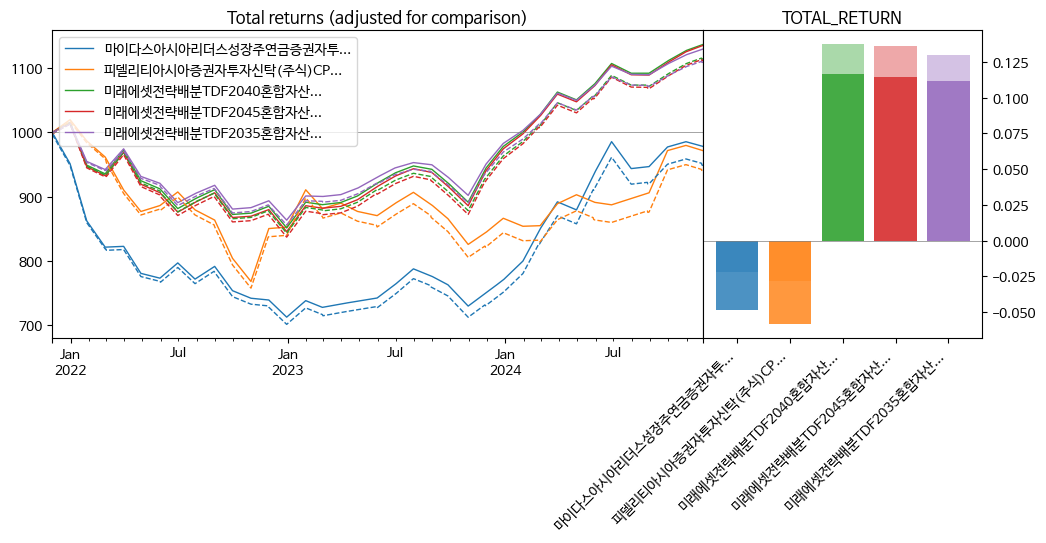

In [49]:
start = df_val.index.min()
fund.plot(t1, fee=fee, base=1000, metric=m, start_date=start)

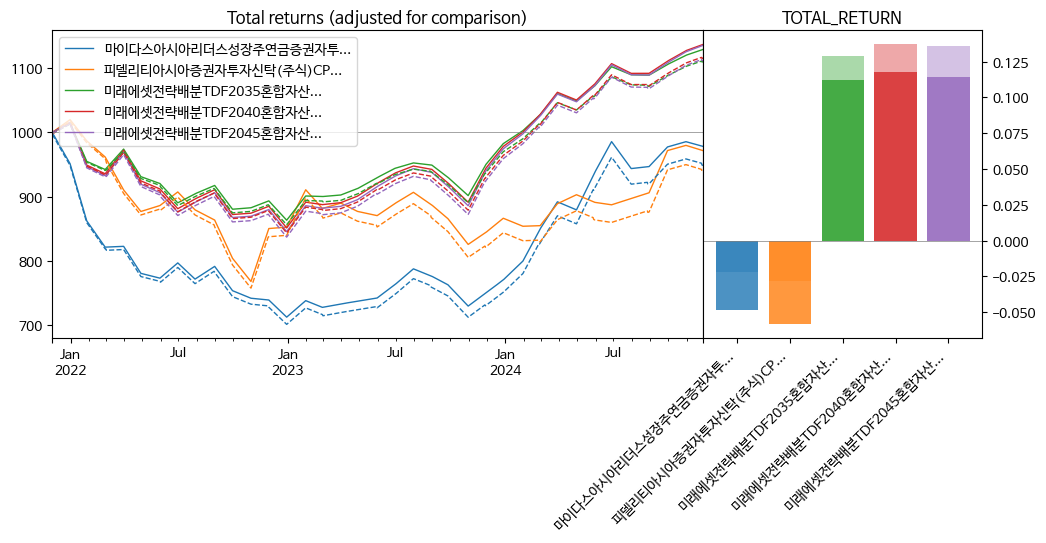

In [50]:
fund.plot(t2, fee=fee, base=1000, metric=m, start_date=start)

# Visualize

## Data

In [4]:
universe = 'UV_FUND'
fund = PM.create_universe(universe, to_daily=False)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

64 securities from 2008-11-28 to 2024-11-29 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded


In [5]:
df_prices = fund.df_prices
df_prices_fees = fund._get_prices_after_fee(df_prices, fee)

In [6]:
func = lambda x: [k for k,v in fund.security_names.items() if x.lower() in v.lower()]
tickers = func('tdf2030')

In [7]:
fund.get_names(tickers)

0) K55234DF2657: IBK로우코스트TDF2030증권자투자신탁[혼합-재간접형]종류C-Re
1) K55105BU1161: 삼성한국형TDF2030증권투자신탁H[주식혼합-재간접형]Cpe(퇴직연금)
2) K55210BU2385: 신한마음편한TDF2030증권투자신탁[주식혼합-재간접형](종류C-re)
3) K55206C95800: 키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)
4) K55213C51049: 한화LIFEPLUSTDF2030증권자투자신탁(혼합-재간접형)종류C-PE(연금저축)
5) K55301BM7731: 미래에셋전략배분TDF2030혼합자산자투자신탁 종류C-Pe
6) K55105BS2072: 삼성한국형TDF2030증권투자신탁H[주식혼합-재간접형]C-Pe
7) K55213C51064: 한화LIFEPLUSTDF2030증권자투자신탁(혼합-재간접형)종류C-RPE(퇴직연금)
8) K55223BT1096: KB온국민TDF2030증권투자신탁(주식혼합-재간접형)C-퇴직e
9) K55301BU6113: 미래에셋전략배분TDF2030혼합자산자투자신탁 종류C-P2e

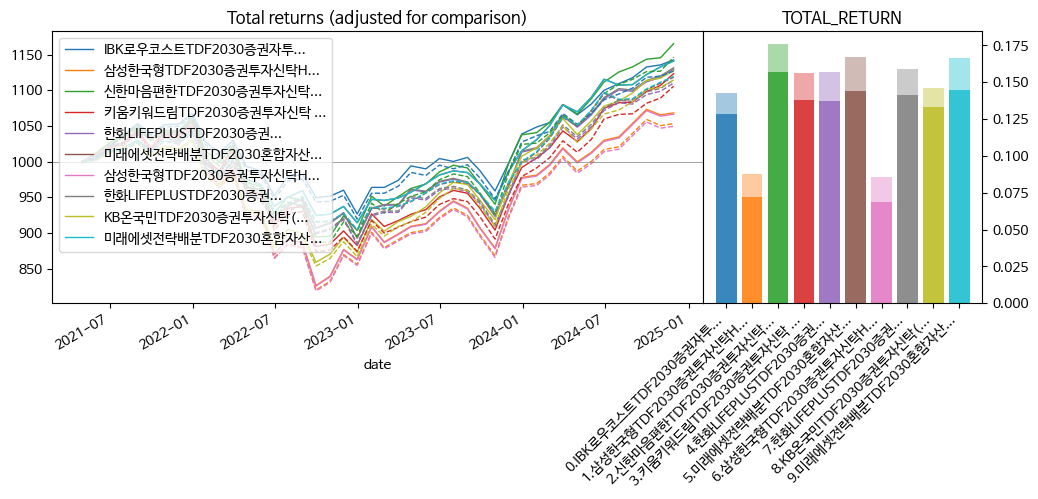

In [9]:
m = 'total_return'
fund.plot(tickers, fee=fee, base=1000, metric=m)

## Dash

### Sample

In [7]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import numpy as np

# Initialize the Dash app
app = dash.Dash(__name__)

# Sample data
categories = ['A', 'B', 'C', 'D']
values1 = np.random.randint(10, 100, size=4)
values2 = np.random.randint(10, 100, size=4)

# App layout
app.layout = html.Div([
    dcc.Graph(id='bar-chart'),
    dcc.Dropdown(
        id='chart-type-dropdown',
        options=[
            {'label': 'Grouped', 'value': 'group'},
            {'label': 'Stacked', 'value': 'stack'}
        ],
        value='group',  # Default value
        clearable=False,
        style={'width': '50%'}
    ),
    dcc.Store(id='bar-data', data={'categories': categories, 'values1': list(values1), 'values2': list(values2)})
])

# Client-side callback (JavaScript function)
app.clientside_callback(
    """
    function(chartType, data) {
        var categories = data.categories;
        var values1 = data.values1;
        var values2 = data.values2;

        var barmode = chartType === 'stack' ? 'stack' : 'group';

        return {
            'data': [
                {
                    'x': categories,
                    'y': values1,
                    'type': 'bar',
                    'name': 'Series 1'
                },
                {
                    'x': categories,
                    'y': values2,
                    'type': 'bar',
                    'name': 'Series 2'
                }
            ],
            'layout': {
                'title': `Bar Chart (${chartType === 'stack' ? 'Stacked' : 'Grouped'})`,
                'barmode': barmode
            }
        };
    }
    """,
    Output('bar-chart', 'figure'),
    [Input('chart-type-dropdown', 'value')],
    [Input('bar-data', 'data')]
)

In [8]:
app.run(debug=True)

In [4]:
# Import packages
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app - incorporate a Dash Bootstrap theme
external_stylesheets = [dbc.themes.CERULEAN]
app = Dash(__name__, external_stylesheets=external_stylesheets)

# App layout
app.layout = dbc.Container([
    dbc.Row([
        html.Div('My First App with Data, Graph, and Controls', className="text-primary text-center fs-3")
    ]),

    dbc.Row([
        dbc.RadioItems(options=[{"label": x, "value": x} for x in ['pop', 'lifeExp', 'gdpPercap']],
                       value='lifeExp',
                       inline=True,
                       id='radio-buttons-final')
    ]),

    dbc.Row([
        dbc.Col([
            dash_table.DataTable(data=df.to_dict('records'), page_size=12, style_table={'overflowX': 'auto'})
        ], width=6),

        dbc.Col([
            dcc.Graph(figure={}, id='my-first-graph-final')
        ], width=6),
    ]),

], fluid=True)

# Add controls to build the interaction
@callback(
    Output(component_id='my-first-graph-final', component_property='figure'),
    Input(component_id='radio-buttons-final', component_property='value')
)
def update_graph(col_chosen):
    fig = px.histogram(df, x='continent', y=col_chosen, histfunc='avg')
    return fig

In [11]:
from dash import Dash, dcc, html, Input, Output, callback, clientside_callback
import pandas as pd

import json

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')

available_countries = df['country'].unique()

app.layout = html.Div([
    dcc.Graph(
        id='clientside-graph'
    ),
    dcc.Store(
        id='clientside-figure-store',
        data=[{
            'x': df[df['country'] == 'Canada']['year'],
            'y': df[df['country'] == 'Canada']['pop']
        }]
    ),
    'Indicator',
    dcc.Dropdown(
        {'pop' : 'Population', 'lifeExp': 'Life Expectancy', 'gdpPercap': 'GDP per Capita'},
        'pop',
        id='clientside-graph-indicator'
    ),
    'Country',
    dcc.Dropdown(available_countries, 'Canada', id='clientside-graph-country'),
    'Graph scale',
    dcc.RadioItems(
        ['linear', 'log'],
        'linear',
        id='clientside-graph-scale'
    ),
    html.Hr(),
    html.Details([
        html.Summary('Contents of figure storage'),
        dcc.Markdown(
            id='clientside-figure-json'
        )
    ])
])


@callback(
    Output('clientside-figure-store', 'data'),
    Input('clientside-graph-indicator', 'value'),
    Input('clientside-graph-country', 'value')
)
def update_store_data(indicator, country):
    dff = df[df['country'] == country]
    return [{
        'x': dff['year'],
        'y': dff[indicator],
        'mode': 'markers'
    }]


clientside_callback(
    """
    function(data, scale) {
        return {
            'data': data,
            'layout': {
                 'yaxis': {'type': scale}
             }
        }
    }
    """,
    Output('clientside-graph', 'figure'),
    Input('clientside-figure-store', 'data'),
    Input('clientside-graph-scale', 'value')
)


@callback(
    Output('clientside-figure-json', 'children'),
    Input('clientside-figure-store', 'data')
)
def generated_figure_json(data):
    return '```\n'+json.dumps(data, indent=2)+'\n```'


if __name__ == '__main__':
    app.run(debug=True)


In [14]:
from dash import Dash, dcc, html, Input, Output, clientside_callback
import pandas as pd
import json

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')

available_countries = df['country'].unique()

app.layout = html.Div([
    dcc.Graph(
        id='clientside-graph'
    ),
    dcc.Store(
        id='data-store',  # Store the full dataset for clientside use
        data=df.to_dict('records')
    ),
    dcc.Store(
        id='clientside-figure-store',
        data=[{
            'x': df[df['country'] == 'Canada']['year'],
            'y': df[df['country'] == 'Canada']['pop']
        }]
    ),
    'Indicator',
    dcc.Dropdown(
        {'pop': 'Population', 'lifeExp': 'Life Expectancy', 'gdpPercap': 'GDP per Capita'},
        'pop',
        id='clientside-graph-indicator'
    ),
    'Country',
    dcc.Dropdown(available_countries, 'Canada', id='clientside-graph-country'),
    'Graph scale',
    dcc.RadioItems(
        ['linear', 'log'],
        'linear',
        id='clientside-graph-scale'
    ),
    html.Hr(),
    html.Details([
        html.Summary('Contents of figure storage'),
        dcc.Markdown(
            id='clientside-figure-json'
        )
    ])
])

# Clientside callback to update the figure store
clientside_callback(
    """
    function(indicator, country, data) {
        // Filter the dataset for the selected country
        const filteredData = data.filter(row => row.country === country);

        // Extract x (year) and y (indicator) values
        const x = filteredData.map(row => row.year);
        const y = filteredData.map(row => row[indicator]);

        // Return the updated figure data
        return [{
            'x': x,
            'y': y,
            'mode': 'markers'
        }];
    }
    """,
    Output('clientside-figure-store', 'data'),
    Input('clientside-graph-indicator', 'value'),
    Input('clientside-graph-country', 'value'),
    Input('data-store', 'data')  # Dataset passed to the clientside callback
)

# Clientside callback to update the graph figure
clientside_callback(
    """
    function(data, scale) {
        return {
            'data': data,
            'layout': {
                 'yaxis': {'type': scale}
             }
        }
    }
    """,
    Output('clientside-graph', 'figure'),
    Input('clientside-figure-store', 'data'),
    Input('clientside-graph-scale', 'value')
)

@callback(
    Output('clientside-figure-json', 'children'),
    Input('clientside-figure-store', 'data')
)
def generated_figure_json(data):
    return '```\n' + json.dumps(data, indent=2) + '\n```'

if __name__ == '__main__':
    app.run(debug=True)
